# Scaled Connectome from Nichenet Results

In [86]:
## Custom scaling for the Interactomes

suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(plotrix))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(nichenetr))
suppressPackageStartupMessages(library(gridExtra))

source("/home/ramadatta/Analysis/1_Schiller_Lab/for_collaborators/Janine/1_Bleomycin_ageing/4_Scripts_Meshal/NicheNet_functions.R")
source("/home/ramadatta/Analysis/1_Schiller_Lab/for_collaborators/Janine/1_Bleomycin_ageing/4_Scripts_Meshal/thesis_functions_R.R")
setwd("/home/ramadatta/Analysis/1_Schiller_Lab/for_collaborators/Janine/1_Bleomycin_ageing/")

In [108]:
ct_order = c("Airway", "Alveolum", "MNP", "Lymphocytes", "Granulocytes", 
             "Fibroblasts", "Pericytes", "SMC", "Mesothelium", "Capillary_ECs",
             "Vascular_ECs","Lymphatic_ECs")

# ct_map = c("Airway_epithelium" = "Airway\nepithelium", "Alveolar_epithelium" = "Alveolar\nepithelium", 
#            "Capillary_ECs" = "Capillary\nendothelium", "Vascular_ECs" = "Vascular\nendothelium",
#            "Lymphatic_ECs" = "Lymphatic\nendothelium")

ct_cols = c("Airway" = "#ffd000", "Alveolum" = "#8c53c6", "MNP" = "#424cb8",
            "Lymphocytes" = "#b22222", "Granulocytes" = "#d2b48c", 
             "Fibroblasts" = "#078c46", "Pericytes" = "#87cefa", "SMC" = "#fcb1c6", "Mesothelium" = "gray",
             "Capillary_ECs" = "#9acd32",
             "Vascular_ECs" = "#cf7c00", "Lymphatic_ECs" = "#ede3b4")



## Colour Palettes
condition_colors <- c("thistle1", "mediumorchid1", "purple3", "purple4", 
                      "lightskyblue1", "lightskyblue", "dodgerblue3", "dodgerblue4")
names(condition_colors) <- c("old_nodes", "old_mid", "old_vertex", "old",
                             "young_nodes", "young_mid", "young_vertex", "young")

source("/home/ramadatta/Analysis/1_Schiller_Lab/for_collaborators/Janine/1_Bleomycin_ageing/4_Scripts_Meshal/NicheNet_functions.R")
source("/home/ramadatta/Analysis/1_Schiller_Lab/for_collaborators/Janine/1_Bleomycin_ageing/4_Scripts_Meshal/thesis_functions_R.R")

### Young Mice

In [124]:
## For same upper and same lower thresholds across all time points
scale_expr = c("d3" = 65, "d10" = 65, "d21" = 65, "d28" = 65, "d42" = 65)

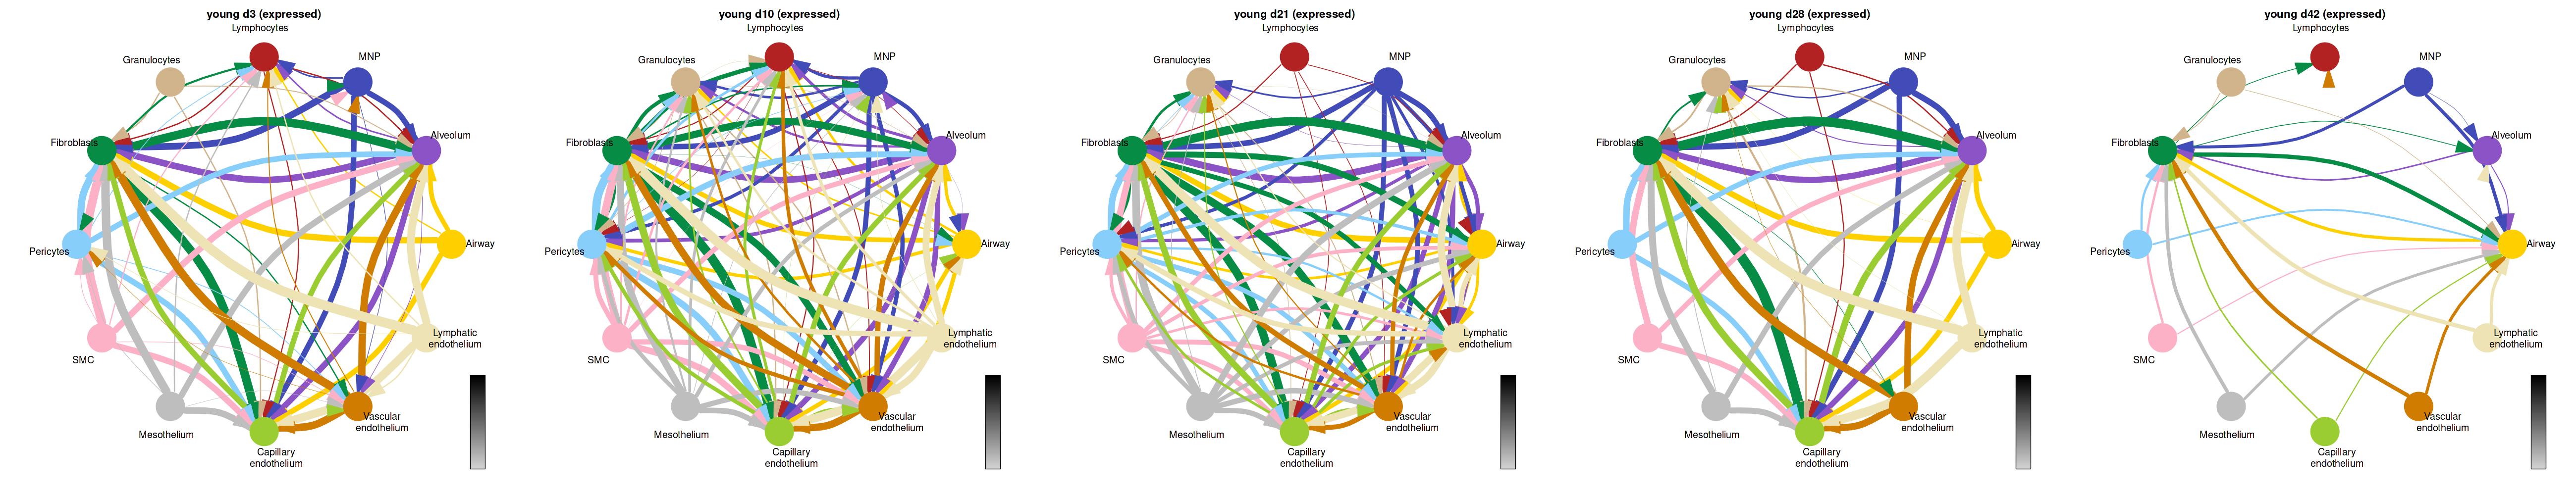

In [127]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

version <- "expressed"
age = "young"
min_expressed = 10
min_upreg = 2

for (time in c("d3", "d10", "d21", "d28", "d42")){
    max_scale = scale_expr[time]
    file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))

    G_young <- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, 
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, max_scale=max_scale,
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

### Old Mice

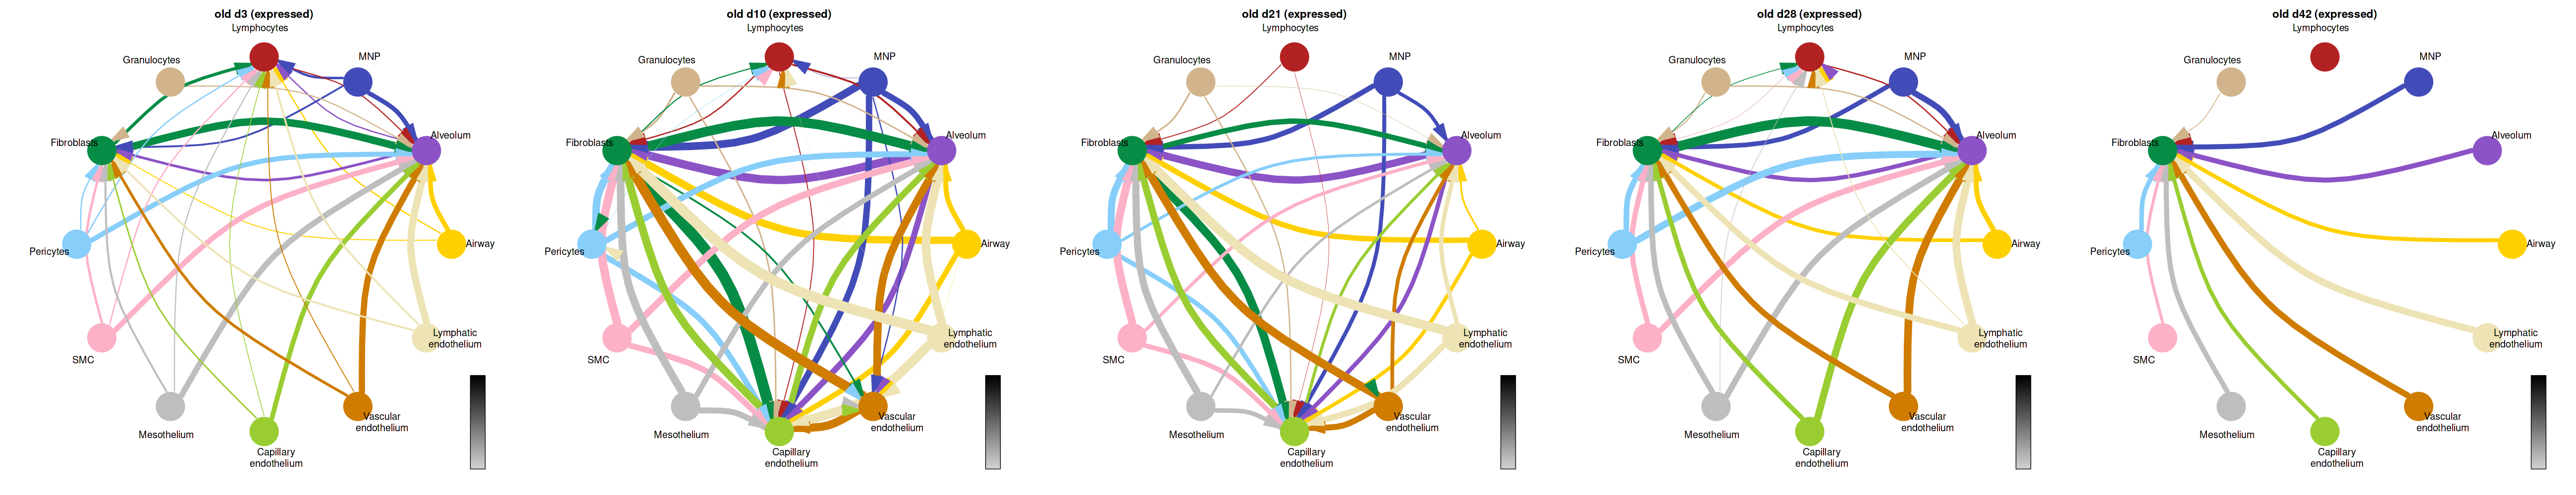

In [129]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)

version <- "expressed"
age = "old"
min_expressed = 10
min_upreg = 2

par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d21", "d28", "d42")){
    max_scale = scale_expr[time]
    file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))
    G_old <- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, max_scale = max_scale,
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

# Difference

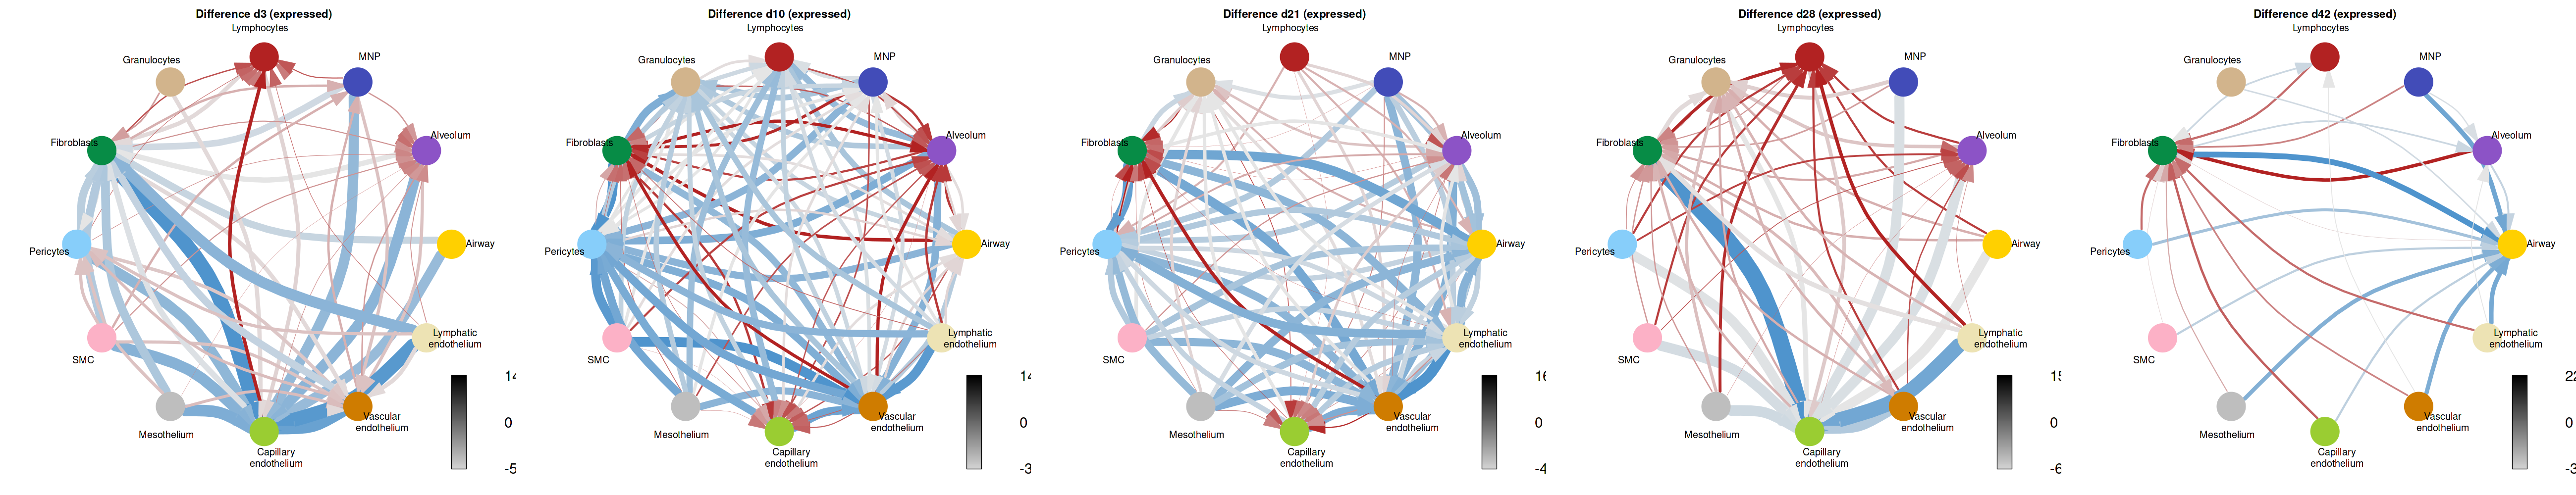

In [131]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

min_expressed = 10
min_upreg = 2
version = "expressed"

for (time in c("d3", "d10", "d21", "d28", "d42")){
    #scale_weight <- ifelse(time == "d42", 8, 5)
    scale_weight <- 5

    matrices <- list()
    for (age in c("young", "old")){
        file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
        matrices[[age]] <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    }
    mat = matrices[["old"]] - matrices[["young"]]
    mat1 = matrices[["old"]]
    mat2 = matrices[["young"]]
    
    #as.data.frame(matrices[["old"]])

    plot_difference_directed_modified(mat1, mat2, min_expressed, min_expressed, ct_map = ct_map, node_size = 15, scale_weight = scale_weight, text_size = 1.75, omit_diff = 2.5,
                             legend = T, ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                             title = paste("Difference", time, "(expressed)"), 
                             xl = 1, yb = -1.2, xr = 1.08, yt = -0.7)
    
    
}

# Generate PDF 

### Young mice

In [111]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

version <- "expressed"
age = "young"
min_expressed = 10
min_upreg = 2

## Save as PDF
filename = paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_", age,
                  "_expr_scaled_min10_max65.pdf")
pdf(file = filename,
    width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d21", "d28", "d42")){
#for (time in c("d42")){
    max_scale = scale_expr[time]
    file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))

    G_young <- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, 
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, max_scale=max_scale,
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

dev.off()

[1] "Saving to Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_young_expr_scaled_min10_max65.pdf"


png 
  2

### Old Mice

In [112]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)

version <- "expressed"
age = "old"
min_expressed = 10
min_upreg = 2

## Save as PDF
filename = paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_", age,
                  "_expr_scaled_min10_max65.pdf")
pdf(file = filename,
    width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d21", "d28", "d42")){
#for (time in c("d42")){        
    max_scale = scale_expr[time]
    file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))
    G_old <- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, max_scale = max_scale,
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

dev.off()

[1] "Saving to Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_old_expr_scaled_min10_max65.pdf"


png 
  2

### Difference

In [132]:
options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

min_expressed = 10
min_upreg = 2
version = "expressed"

## Save as PDF
filename = paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_expr_scaled_diff.pdf")
pdf(file = filename,
    width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d21", "d28", "d42")){
    scale_weight <- 5

    matrices <- list()
    for (age in c("young", "old")){
        file <- paste0(age, "_timeseries/adjacency_matrix_", version, "_", time, "_", age, ".txt")
        matrices[[age]] <- read.delim(paste0("Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/", file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    }
    mat = matrices[["old"]] - matrices[["young"]]
    mat1 = matrices[["old"]]
    mat2 = matrices[["young"]]
    
    #as.data.frame(matrices[["old"]])

    plot_difference_directed_modified(mat1, mat2, min_expressed, min_expressed, ct_map = ct_map, node_size = 15, scale_weight = scale_weight, text_size = 1.75, omit_diff = 2.5,
                             legend = T, ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                             title = paste("Difference", time, "(expressed)"), 
                             xl = 1, yb = -1.2, xr = 1.08, yt = -0.7)
    
    
}
dev.off()



[1] "Saving to Bleomycin_datta_output_scripts/4_Whole_Pipeline/NicheNet_meta_output/Interactome_Scaled/interactome_all_expr_scaled_diff.pdf"


png 
  2